In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

In [ ]:
1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, 
zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с 
использованием intercept, так и без.

In [30]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
С помощью intercept:

In [8]:
model = LinearRegression() # зададим модель линейной регрессии
zp = zp.reshape(-1,1) # делаем массив zp двумерным атрибутом 
regres = model.fit(zp, ks) # подбираем коэффициенты
const = regres.intercept_
beta = regres.coef_
r_sq = model.score(zp, ks)
print(const) # выводим интерсепрт
print(beta) # выводим коэффициенты
print(r_sq)

444.17735732435955
[2.62053888]
0.7876386635293686


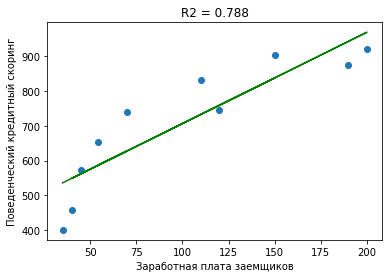

In [20]:
plt.scatter(zp, ks)
plt.plot(zp, const + beta * zp, c='g')
plt.title(f'R2 = {round(r_sq, 3)}')
plt.xlabel('Заработная плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

In [ ]:
Без помощи intercept:

In [16]:
r = np.corrcoef(zp, ks)
r[0][1]

0.8874900920739162

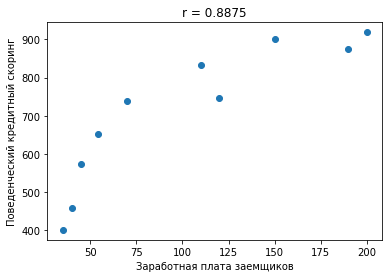

In [22]:
plt.scatter(zp, ks)
plt.title(f'r = {round(r[0][1], 4)}')
plt.xlabel('Заработная плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

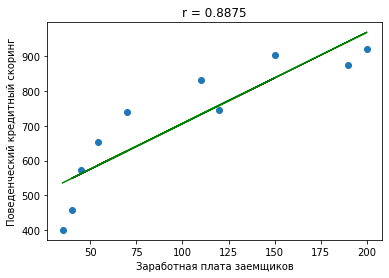

In [23]:
b0 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b1 = np.mean(ks) - b0 * np.mean(zp)

plt.scatter(zp, ks)
plt.plot(zp, b1 + b0 * zp, c='g')
plt.title(f'r = {round(r[0][1], 4)}')
plt.xlabel('Заработная плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

In [ ]:
Произведенный расчет наглядно показывает линейную зависимость между величиной заработной платы и значением кредитного скоринга.

2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [25]:
def mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

In [26]:
mse(b, zp, ks)

203763.93896082853

In [27]:
def mse_p(b,x,y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [29]:
alpha = 1e-6
b = 0.1
mse_min = mse(b, zp, ks)
i_min = 1
b_min = b
iteration = 10000
for i in range(iteration):
    b -= alpha * mse_p(b, zp, ks)
    if i % 100 == 0:
        print(f'Итерация #{i}, b={b}, mse={mse(b, zp, ks)}')
    if mse(b, zp, ks) > mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум =>\nПолучили: {b_min} ')
        break
    else:
        mse_min = mse(b,zp,ks)
        i_min = i
        b_min = b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум =>
Получили: 5.889820285147628 


In [ ]:
3.Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на 
каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [31]:
def mse_ab(a,b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

In [32]:
def mse_pa(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

In [33]:
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [34]:
alpha = 3e-5
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
iteration = 1000000   
for i in range(iteration):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 50000 == 0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={mse_ab(a, b, zp, ks)}')
    if mse_ab(a, b, zp, ks) > mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min = mse_ab(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f'a = {a_min}\nb = {b_min}')

Итерация #0, a=0.14197959999999998, b=4.884978596113599, mse=70366.2821016992
Итерация #50000, a=236.72655235964433, b=4.147445287981601, mse=17387.09579189967
Итерация #100000, a=347.2559075176058, b=3.3339127474648516, mse=8853.283372220058
Итерация #150000, a=398.89545333636954, b=2.953828643644366, mse=6990.541626266601
Итерация #200000, a=423.0215571081485, b=2.7762525556795365, mse=6583.946467915477
Итерация #250000, a=434.29332323191153, b=2.69328863611563, mse=6495.195773862671
Итерация #300000, a=439.5595159313502, b=2.6545277194387675, mse=6475.823468184463
Итерация #350000, a=442.0198921708081, b=2.6364185381280407, mse=6471.594924044105
Итерация #400000, a=443.16938509390076, b=2.6279578907579992, mse=6470.671926759022
Итерация #450000, a=443.70643059087314, b=2.624005058617609, mse=6470.470456948132
Итерация #500000, a=443.95733936988626, b=2.622158287177236, mse=6470.426480562332
Итерация #550000, a=444.07456447602823, b=2.6212954716991606, mse=6470.41688149387
Итерация #

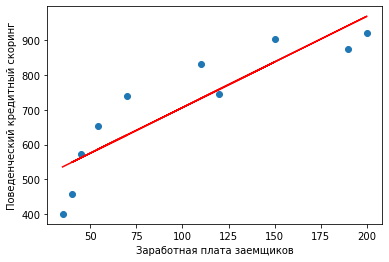

In [35]:
plt.scatter(zp, ks)
plt.plot(zp, a_min + b_min * zp, c = 'r')
plt.xlabel('Заработная плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()